# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import pickle
from matplotlib import pyplot as mp

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_index = []
city_list = []
df = []

settings = {"units": "imperial", "appid": api_key}
summary = ['name', 'main.temp_max', 'main.humidity', 'clouds.all', 'wind.speed', 'coord.lon', 'coord.lat']

for city in cities:
    try: 
        current_weather = owm.get_current(city, **settings)
        found = current_weather(*summary)
        city_list.append(found)
        city_index.append(current_weather['name'])
        print(current_weather['name'])
    except:
        print('Skipping city not found...')

df = pd.DataFrame(city_list, columns=['Name', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Longitude', 'Latitude'], index=city_index)

Skipping city not found...
Saskylakh
Omsukchan
Skipping city not found...
Mataura
Wattegama
Mar del Plata
Rikitea
Katsuura
Narsaq
Hithadhoo
Puerto Ayora
Longjiang
Pevek
Skipping city not found...
Punta Arenas
Tasiilaq
Albany
Dzhebariki-Khaya
Necochea
Butaritari
Tiksi
Busselton
Gelemso
Castro
Pierre
Arraial do Cabo
Khatanga
Puerto Baquerizo Moreno
Kavieng
Skipping city not found...
Kalispell
Saint George
Siemiatycze
Atuona
Yellowknife
Sun Valley
Podporozhye
Ekhabi
Ushuaia
Nouadhibou
Hermanus
Ancud
Port Hardy
Khandyga
Avera
Bluff
Chuy
King City
East London
Hofn
Turukhansk
Hambantota
Saint-Philippe
Avarua
Klaksvik
Osorno
Kapaa
Nikolskoye
Skipping city not found...
Resistencia
Amalapuram
Mulanje
Luau
Inhambane
San Patricio
Basco
Thunder Bay
New Norfolk
Fukue
Caravelas
Fort-Shevchenko
Sesvete
Mattru
Gao
Vaini
Komsomolskiy
Lorengau
Altayskoye
Kahului
Qaanaaq
Ilulissat
Schotten
Port Alfred
Cayenne
Praia da Vitoria
Riyadh
Kaitangata
Hobart
Skipping city not found...
Lebu
Kaeo
Alugan
Hamilton
A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df.to_csv(output_data_file, encoding='utf-8', index=False)
df

,Name,Temp,Humidity,Cloudiness,Wind Speed,Longitude,Latitude
Saskylakh,Saskylakh,-4.40,65,8,14.20,114.09,71.97
Omsukchan,Omsukchan,-6.56,66,76,8.61,155.80,62.53
Mataura,Mataura,70.00,54,88,13.00,168.86,-46.19
Wattegama,Wattegama,85.20,71,12,3.13,80.68,7.35
Mar del Plata,Mar del Plata,52.13,64,0,17.22,-67.52,-46.43
Rikitea,Rikitea,80.57,98,92,11.18,-134.97,-23.12
Katsuura,Katsuura,55.40,76,75,18.34,134.50,33.93
Narsaq,Narsaq,30.20,36,48,5.82,-46.05,60.91
Hithadhoo,Hithadhoo,84.12,98,24,13.20,73.08,-0.60
Puerto Ayora,Puerto Ayora,79.04,100,68,1.34,-90.35,-0.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

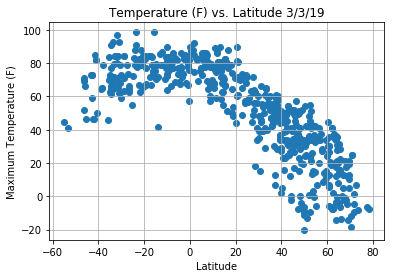

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure()
plt.title('Temperature (F) vs. Latitude 3/3/19')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid()
plt.scatter(df['Latitude'], df['Temp'])
plt.show()
plt.savefig('lat_temp_plot.png')

#### Latitude vs. Humidity Plot

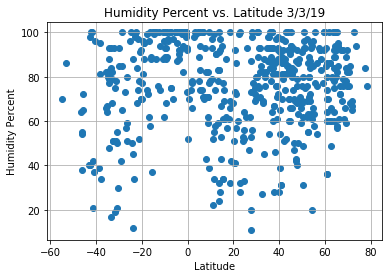

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure()
plt.title('Humidity Percent vs. Latitude 3/3/19')
plt.xlabel('Latitude')
plt.ylabel('Humidity Percent')
plt.grid()
plt.scatter(df['Latitude'], df['Humidity'])
plt.show()
plt.savefig('lat_humidity_plot.png')

#### Latitude vs. Cloudiness Plot

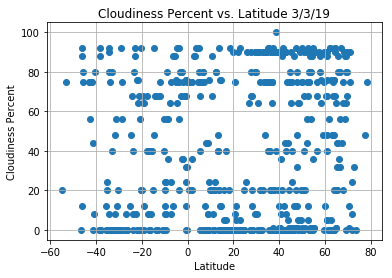

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure()
plt.title('Cloudiness Percent vs. Latitude 3/3/19')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percent')
plt.grid()
plt.scatter(df['Latitude'], df['Cloudiness'])
plt.show()
plt.savefig('lat_cloud_plot.png')

#### Latitude vs. Wind Speed Plot

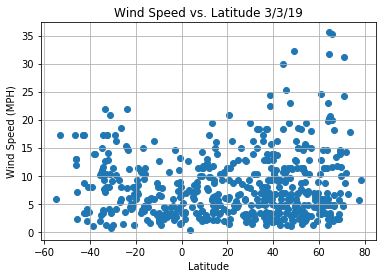

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure()
plt.title('Wind Speed vs. Latitude 3/3/19')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()
plt.scatter(df['Latitude'], df['Wind Speed'])
plt.show()
plt.savefig('lat_wind_plot.png')